# Running the VHCT Algorithm To Tune SVM on the Landmine Dataset

First of all, the required packages need to be loaded. Note that "import sys" and "sys.path.append("../") are not required when writing .py codes.

In [1]:
import sys
sys.path.append("../") # go to parent dir

from PyXAB.algos import *

from PyXAB.partition.BinaryPartition import BinaryPartition
from PyXAB.utils.plot import compare_regret, compare_regret_withsd
from PyXAB.landmine.landmine_obj import obj_func_landmine
import numpy as np
import pickle


Load the dataset, split the dataset into the training set and the testing set. Then define the objective function using the dataset.

In [2]:

landmine_data = pickle.load(open("../PyXAB/landmine/landmine_formated_data.pkl", "rb"))
all_X_train, all_Y_train, all_X_test, all_Y_test = landmine_data["all_X_train"], landmine_data["all_Y_train"], \
                                                       landmine_data["all_X_test"], landmine_data["all_Y_test"]

X_train = all_X_train[0]
Y_train = np.squeeze(all_Y_train[0])
X_test = all_X_test[0]
Y_test = np.squeeze(all_Y_test[0])

target = obj_func_landmine(X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)

Define the parameter domain, the partition chosen, the number of rounds, and the number of trial runs

In [3]:
domain = [[1e-4, 10.0], [1e-2, 10.0]]
partition = BinaryPartition
rounds = 500
trials = 5

Run the algorithm and record the cumulative regret of each round

In [4]:

regret_array = []
for i in range(trials):
    
    algo = VHCT.VHCT(domain=domain, rho=0.5, partition=partition)
    regret_list = []
    regret = 0
    for t in range(1, rounds + 1):
        point = algo.pull(t)
        reward = target.f(point)
        algo.receive_reward(t, reward)
        inst_regret = target.fmax - reward
        print('Trial:', i+1, 'Round: ', t, 'Instant Regret: ', inst_regret)
        regret += inst_regret
        regret_list.append(regret)

    regret_array.append(np.array(regret_list))
    

Trial: 1 Round:  1 Instant Regret:  0.3575384615384616
Trial: 1 Round:  2 Instant Regret:  0.3544615384615385
Trial: 1 Round:  3 Instant Regret:  0.35861538461538467
Trial: 1 Round:  4 Instant Regret:  0.31938461538461516
Trial: 1 Round:  5 Instant Regret:  0.3593846153846153
Trial: 1 Round:  6 Instant Regret:  0.3349230769230769
Trial: 1 Round:  7 Instant Regret:  0.3349230769230769
Trial: 1 Round:  8 Instant Regret:  0.3347692307692307
Trial: 1 Round:  9 Instant Regret:  0.33799999999999997
Trial: 1 Round:  10 Instant Regret:  0.28230769230769237
Trial: 1 Round:  11 Instant Regret:  0.36615384615384616
Trial: 1 Round:  12 Instant Regret:  0.3604615384615384
Trial: 1 Round:  13 Instant Regret:  0.38523076923076927
Trial: 1 Round:  14 Instant Regret:  0.34761538461538466
Trial: 1 Round:  15 Instant Regret:  0.2826153846153847
Trial: 1 Round:  16 Instant Regret:  0.3378461538461538
Trial: 1 Round:  17 Instant Regret:  0.3349230769230769
Trial: 1 Round:  18 Instant Regret:  0.33453846153

Trial: 1 Round:  157 Instant Regret:  0.16476923076923078
Trial: 1 Round:  158 Instant Regret:  0.16600000000000004
Trial: 1 Round:  159 Instant Regret:  0.1958461538461539
Trial: 1 Round:  160 Instant Regret:  0.16492307692307695
Trial: 1 Round:  161 Instant Regret:  0.1656923076923077
Trial: 1 Round:  162 Instant Regret:  0.1646153846153846
Trial: 1 Round:  163 Instant Regret:  0.16584615384615387
Trial: 1 Round:  164 Instant Regret:  0.16507692307692312
Trial: 1 Round:  165 Instant Regret:  0.1661538461538461
Trial: 1 Round:  166 Instant Regret:  0.16584615384615387
Trial: 1 Round:  167 Instant Regret:  0.16507692307692312
Trial: 1 Round:  168 Instant Regret:  0.19169230769230772
Trial: 1 Round:  169 Instant Regret:  0.1646153846153846
Trial: 1 Round:  170 Instant Regret:  0.19600000000000006
Trial: 1 Round:  171 Instant Regret:  0.19369230769230772
Trial: 1 Round:  172 Instant Regret:  0.1672307692307693
Trial: 1 Round:  173 Instant Regret:  0.1646153846153846
Trial: 1 Round:  174 

Trial: 1 Round:  304 Instant Regret:  0.1606153846153846
Trial: 1 Round:  305 Instant Regret:  0.16030769230769226
Trial: 1 Round:  306 Instant Regret:  0.1596923076923077
Trial: 1 Round:  307 Instant Regret:  0.1606153846153846
Trial: 1 Round:  308 Instant Regret:  0.16030769230769226
Trial: 1 Round:  309 Instant Regret:  0.16030769230769226
Trial: 1 Round:  310 Instant Regret:  0.16000000000000003
Trial: 1 Round:  311 Instant Regret:  0.1601538461538461
Trial: 1 Round:  312 Instant Regret:  0.1606153846153846
Trial: 1 Round:  313 Instant Regret:  0.16092307692307695
Trial: 1 Round:  314 Instant Regret:  0.16000000000000003
Trial: 1 Round:  315 Instant Regret:  0.16092307692307695
Trial: 1 Round:  316 Instant Regret:  0.16092307692307695
Trial: 1 Round:  317 Instant Regret:  0.16000000000000003
Trial: 1 Round:  318 Instant Regret:  0.16000000000000003
Trial: 1 Round:  319 Instant Regret:  0.1606153846153846
Trial: 1 Round:  320 Instant Regret:  0.1606153846153846
Trial: 1 Round:  321 

Trial: 1 Round:  464 Instant Regret:  0.1546153846153846
Trial: 1 Round:  465 Instant Regret:  0.1546153846153846
Trial: 1 Round:  466 Instant Regret:  0.1546153846153846
Trial: 1 Round:  467 Instant Regret:  0.1546153846153846
Trial: 1 Round:  468 Instant Regret:  0.1546153846153846
Trial: 1 Round:  469 Instant Regret:  0.16553846153846152
Trial: 1 Round:  470 Instant Regret:  0.1546153846153846
Trial: 1 Round:  471 Instant Regret:  0.1546153846153846
Trial: 1 Round:  472 Instant Regret:  0.15584615384615386
Trial: 1 Round:  473 Instant Regret:  0.1535384615384615
Trial: 1 Round:  474 Instant Regret:  0.15523076923076928
Trial: 1 Round:  475 Instant Regret:  0.1546153846153846
Trial: 1 Round:  476 Instant Regret:  0.15553846153846163
Trial: 1 Round:  477 Instant Regret:  0.1546153846153846
Trial: 1 Round:  478 Instant Regret:  0.1546153846153846
Trial: 1 Round:  479 Instant Regret:  0.15446153846153843
Trial: 1 Round:  480 Instant Regret:  0.15553846153846163
Trial: 1 Round:  481 Inst

Trial: 2 Round:  117 Instant Regret:  0.1747692307692308
Trial: 2 Round:  118 Instant Regret:  0.17307692307692313
Trial: 2 Round:  119 Instant Regret:  0.3544615384615385
Trial: 2 Round:  120 Instant Regret:  0.3553846153846154
Trial: 2 Round:  121 Instant Regret:  0.17553846153846142
Trial: 2 Round:  122 Instant Regret:  0.17261538461538461
Trial: 2 Round:  123 Instant Regret:  0.17261538461538461
Trial: 2 Round:  124 Instant Regret:  0.1747692307692308
Trial: 2 Round:  125 Instant Regret:  0.1721538461538461
Trial: 2 Round:  126 Instant Regret:  0.1747692307692308
Trial: 2 Round:  127 Instant Regret:  0.17292307692307696
Trial: 2 Round:  128 Instant Regret:  0.1747692307692308
Trial: 2 Round:  129 Instant Regret:  0.27292307692307693
Trial: 2 Round:  130 Instant Regret:  0.17584615384615376
Trial: 2 Round:  131 Instant Regret:  0.17184615384615387
Trial: 2 Round:  132 Instant Regret:  0.1741538461538461
Trial: 2 Round:  133 Instant Regret:  0.17446153846153845
Trial: 2 Round:  134 I

Trial: 2 Round:  267 Instant Regret:  0.15569230769230769
Trial: 2 Round:  268 Instant Regret:  0.15476923076923077
Trial: 2 Round:  269 Instant Regret:  0.15630769230769226
Trial: 2 Round:  270 Instant Regret:  0.15523076923076928
Trial: 2 Round:  271 Instant Regret:  0.15430769230769226
Trial: 2 Round:  272 Instant Regret:  0.1747692307692308
Trial: 2 Round:  273 Instant Regret:  0.15430769230769226
Trial: 2 Round:  274 Instant Regret:  0.15384615384615385
Trial: 2 Round:  275 Instant Regret:  0.1550769230769231
Trial: 2 Round:  276 Instant Regret:  0.15430769230769226
Trial: 2 Round:  277 Instant Regret:  0.15399999999999991
Trial: 2 Round:  278 Instant Regret:  0.15415384615384609
Trial: 2 Round:  279 Instant Regret:  0.17353846153846142
Trial: 2 Round:  280 Instant Regret:  0.15399999999999991
Trial: 2 Round:  281 Instant Regret:  0.15399999999999991
Trial: 2 Round:  282 Instant Regret:  0.15492307692307694
Trial: 2 Round:  283 Instant Regret:  0.15630769230769226
Trial: 2 Round: 

Trial: 2 Round:  417 Instant Regret:  0.1466153846153846
Trial: 2 Round:  418 Instant Regret:  0.1466153846153846
Trial: 2 Round:  419 Instant Regret:  0.1450769230769231
Trial: 2 Round:  420 Instant Regret:  0.1466153846153846
Trial: 2 Round:  421 Instant Regret:  0.14538461538461545
Trial: 2 Round:  422 Instant Regret:  0.1466153846153846
Trial: 2 Round:  423 Instant Regret:  0.1466153846153846
Trial: 2 Round:  424 Instant Regret:  0.1450769230769231
Trial: 2 Round:  425 Instant Regret:  0.1461538461538462
Trial: 2 Round:  426 Instant Regret:  0.14430769230769225
Trial: 2 Round:  427 Instant Regret:  0.1466153846153846
Trial: 2 Round:  428 Instant Regret:  0.1455384615384615
Trial: 2 Round:  429 Instant Regret:  0.1466153846153846
Trial: 2 Round:  430 Instant Regret:  0.1455384615384615
Trial: 2 Round:  431 Instant Regret:  0.14569230769230768
Trial: 2 Round:  432 Instant Regret:  0.1466153846153846
Trial: 2 Round:  433 Instant Regret:  0.14569230769230768
Trial: 2 Round:  434 Instan

Trial: 3 Round:  69 Instant Regret:  0.3575384615384616
Trial: 3 Round:  70 Instant Regret:  0.3569230769230769
Trial: 3 Round:  71 Instant Regret:  0.35753846153846147
Trial: 3 Round:  72 Instant Regret:  0.3575384615384616
Trial: 3 Round:  73 Instant Regret:  0.3593846153846153
Trial: 3 Round:  74 Instant Regret:  0.3512307692307691
Trial: 3 Round:  75 Instant Regret:  0.35753846153846147
Trial: 3 Round:  76 Instant Regret:  0.3575384615384616
Trial: 3 Round:  77 Instant Regret:  0.3575384615384616
Trial: 3 Round:  78 Instant Regret:  0.3575384615384616
Trial: 3 Round:  79 Instant Regret:  0.35753846153846147
Trial: 3 Round:  80 Instant Regret:  0.31153846153846154
Trial: 3 Round:  81 Instant Regret:  0.39076923076923076
Trial: 3 Round:  82 Instant Regret:  0.36723076923076925
Trial: 3 Round:  83 Instant Regret:  0.3236923076923077
Trial: 3 Round:  84 Instant Regret:  0.34907692307692306
Trial: 3 Round:  85 Instant Regret:  0.3349230769230769
Trial: 3 Round:  86 Instant Regret:  0.31

Trial: 3 Round:  222 Instant Regret:  0.3533846153846154
Trial: 3 Round:  223 Instant Regret:  0.34969230769230775
Trial: 3 Round:  224 Instant Regret:  0.3533846153846154
Trial: 3 Round:  225 Instant Regret:  0.34969230769230775
Trial: 3 Round:  226 Instant Regret:  0.3524615384615384
Trial: 3 Round:  227 Instant Regret:  0.3063076923076923
Trial: 3 Round:  228 Instant Regret:  0.3595384615384616
Trial: 3 Round:  229 Instant Regret:  0.2827692307692308
Trial: 3 Round:  230 Instant Regret:  0.2932307692307693
Trial: 3 Round:  231 Instant Regret:  0.293076923076923
Trial: 3 Round:  232 Instant Regret:  0.2932307692307692
Trial: 3 Round:  233 Instant Regret:  0.29292307692307695
Trial: 3 Round:  234 Instant Regret:  0.29338461538461535
Trial: 3 Round:  235 Instant Regret:  0.2932307692307692
Trial: 3 Round:  236 Instant Regret:  0.2930769230769231
Trial: 3 Round:  237 Instant Regret:  0.2932307692307692
Trial: 3 Round:  238 Instant Regret:  0.29338461538461535
Trial: 3 Round:  239 Instan

Trial: 3 Round:  366 Instant Regret:  0.34323076923076923
Trial: 3 Round:  367 Instant Regret:  0.3604615384615384
Trial: 3 Round:  368 Instant Regret:  0.2824615384615383
Trial: 3 Round:  369 Instant Regret:  0.35923076923076924
Trial: 3 Round:  370 Instant Regret:  0.30999999999999994
Trial: 3 Round:  371 Instant Regret:  0.3538461538461538
Trial: 3 Round:  372 Instant Regret:  0.32861538461538464
Trial: 3 Round:  373 Instant Regret:  0.30692307692307697
Trial: 3 Round:  374 Instant Regret:  0.3061538461538462
Trial: 3 Round:  375 Instant Regret:  0.3061538461538462
Trial: 3 Round:  376 Instant Regret:  0.30692307692307697
Trial: 3 Round:  377 Instant Regret:  0.3063076923076924
Trial: 3 Round:  378 Instant Regret:  0.30692307692307697
Trial: 3 Round:  379 Instant Regret:  0.3063076923076924
Trial: 3 Round:  380 Instant Regret:  0.30707692307692314
Trial: 3 Round:  381 Instant Regret:  0.3063076923076924
Trial: 3 Round:  382 Instant Regret:  0.30692307692307697
Trial: 3 Round:  383 I

Trial: 4 Round:  16 Instant Regret:  0.31138461538461526
Trial: 4 Round:  17 Instant Regret:  0.3575384615384616
Trial: 4 Round:  18 Instant Regret:  0.3575384615384616
Trial: 4 Round:  19 Instant Regret:  0.3575384615384616
Trial: 4 Round:  20 Instant Regret:  0.37984615384615394
Trial: 4 Round:  21 Instant Regret:  0.3575384615384616
Trial: 4 Round:  22 Instant Regret:  0.3569230769230769
Trial: 4 Round:  23 Instant Regret:  0.34676923076923083
Trial: 4 Round:  24 Instant Regret:  0.36015384615384616
Trial: 4 Round:  25 Instant Regret:  0.3575384615384616
Trial: 4 Round:  26 Instant Regret:  0.35861538461538467
Trial: 4 Round:  27 Instant Regret:  0.31138461538461526
Trial: 4 Round:  28 Instant Regret:  0.3278461538461539
Trial: 4 Round:  29 Instant Regret:  0.316923076923077
Trial: 4 Round:  30 Instant Regret:  0.3116923076923078
Trial: 4 Round:  31 Instant Regret:  0.3116923076923078
Trial: 4 Round:  32 Instant Regret:  0.316923076923077
Trial: 4 Round:  33 Instant Regret:  0.35692

Trial: 4 Round:  163 Instant Regret:  0.29000000000000004
Trial: 4 Round:  164 Instant Regret:  0.33507692307692305
Trial: 4 Round:  165 Instant Regret:  0.3346153846153844
Trial: 4 Round:  166 Instant Regret:  0.3347692307692306
Trial: 4 Round:  167 Instant Regret:  0.3349230769230769
Trial: 4 Round:  168 Instant Regret:  0.3346153846153844
Trial: 4 Round:  169 Instant Regret:  0.3349230769230769
Trial: 4 Round:  170 Instant Regret:  0.3346153846153844
Trial: 4 Round:  171 Instant Regret:  0.3349230769230769
Trial: 4 Round:  172 Instant Regret:  0.3690769230769231
Trial: 4 Round:  173 Instant Regret:  0.3575384615384616
Trial: 4 Round:  174 Instant Regret:  0.29800000000000004
Trial: 4 Round:  175 Instant Regret:  0.2841538461538462
Trial: 4 Round:  176 Instant Regret:  0.3575384615384616
Trial: 4 Round:  177 Instant Regret:  0.3346153846153844
Trial: 4 Round:  178 Instant Regret:  0.35769230769230775
Trial: 4 Round:  179 Instant Regret:  0.3349230769230769
Trial: 4 Round:  180 Instan

Trial: 4 Round:  306 Instant Regret:  0.21923076923076923
Trial: 4 Round:  307 Instant Regret:  0.21815384615384614
Trial: 4 Round:  308 Instant Regret:  0.2193846153846154
Trial: 4 Round:  309 Instant Regret:  0.21907692307692306
Trial: 4 Round:  310 Instant Regret:  0.2198461538461538
Trial: 4 Round:  311 Instant Regret:  0.2193846153846153
Trial: 4 Round:  312 Instant Regret:  0.21907692307692306
Trial: 4 Round:  313 Instant Regret:  0.26984615384615374
Trial: 4 Round:  314 Instant Regret:  0.1712307692307693
Trial: 4 Round:  315 Instant Regret:  0.17199999999999993
Trial: 4 Round:  316 Instant Regret:  0.26984615384615374
Trial: 4 Round:  317 Instant Regret:  0.17338461538461536
Trial: 4 Round:  318 Instant Regret:  0.17199999999999993
Trial: 4 Round:  319 Instant Regret:  0.17092307692307696
Trial: 4 Round:  320 Instant Regret:  0.26984615384615374
Trial: 4 Round:  321 Instant Regret:  0.17353846153846153
Trial: 4 Round:  322 Instant Regret:  0.1712307692307693
Trial: 4 Round:  32

Trial: 4 Round:  461 Instant Regret:  0.1586153846153845
Trial: 4 Round:  462 Instant Regret:  0.15846153846153854
Trial: 4 Round:  463 Instant Regret:  0.1581538461538462
Trial: 4 Round:  464 Instant Regret:  0.1581538461538462
Trial: 4 Round:  465 Instant Regret:  0.15846153846153854
Trial: 4 Round:  466 Instant Regret:  0.15846153846153854
Trial: 4 Round:  467 Instant Regret:  0.15830769230769226
Trial: 4 Round:  468 Instant Regret:  0.15769230769230758
Trial: 4 Round:  469 Instant Regret:  0.15784615384615386
Trial: 4 Round:  470 Instant Regret:  0.15784615384615386
Trial: 4 Round:  471 Instant Regret:  0.1586153846153846
Trial: 4 Round:  472 Instant Regret:  0.15769230769230758
Trial: 4 Round:  473 Instant Regret:  0.15784615384615386
Trial: 4 Round:  474 Instant Regret:  0.1581538461538462
Trial: 4 Round:  475 Instant Regret:  0.15738461538461535
Trial: 4 Round:  476 Instant Regret:  0.15830769230769226
Trial: 4 Round:  477 Instant Regret:  0.1586153846153846
Trial: 4 Round:  478

Trial: 5 Round:  124 Instant Regret:  0.21569230769230774
Trial: 5 Round:  125 Instant Regret:  0.2163076923076923
Trial: 5 Round:  126 Instant Regret:  0.21492307692307688
Trial: 5 Round:  127 Instant Regret:  0.21446153846153848
Trial: 5 Round:  128 Instant Regret:  0.2193846153846154
Trial: 5 Round:  129 Instant Regret:  0.3349230769230769
Trial: 5 Round:  130 Instant Regret:  0.3349230769230769
Trial: 5 Round:  131 Instant Regret:  0.2138461538461539
Trial: 5 Round:  132 Instant Regret:  0.2143076923076923
Trial: 5 Round:  133 Instant Regret:  0.21446153846153848
Trial: 5 Round:  134 Instant Regret:  0.21753846153846157
Trial: 5 Round:  135 Instant Regret:  0.30107692307692313
Trial: 5 Round:  136 Instant Regret:  0.21569230769230774
Trial: 5 Round:  137 Instant Regret:  0.21446153846153848
Trial: 5 Round:  138 Instant Regret:  0.3424615384615385
Trial: 5 Round:  139 Instant Regret:  0.3118461538461538
Trial: 5 Round:  140 Instant Regret:  0.21415384615384625
Trial: 5 Round:  141 I

Trial: 5 Round:  287 Instant Regret:  0.2163076923076923
Trial: 5 Round:  288 Instant Regret:  0.21661538461538465
Trial: 5 Round:  289 Instant Regret:  0.21569230769230763
Trial: 5 Round:  290 Instant Regret:  0.2163076923076923
Trial: 5 Round:  291 Instant Regret:  0.21615384615384614
Trial: 5 Round:  292 Instant Regret:  0.21569230769230763
Trial: 5 Round:  293 Instant Regret:  0.2158461538461538
Trial: 5 Round:  294 Instant Regret:  0.21553846153846146
Trial: 5 Round:  295 Instant Regret:  0.21907692307692306
Trial: 5 Round:  296 Instant Regret:  0.21569230769230763
Trial: 5 Round:  297 Instant Regret:  0.21661538461538465
Trial: 5 Round:  298 Instant Regret:  0.21553846153846146
Trial: 5 Round:  299 Instant Regret:  0.2163076923076923
Trial: 5 Round:  300 Instant Regret:  0.21692307692307689
Trial: 5 Round:  301 Instant Regret:  0.21599999999999997
Trial: 5 Round:  302 Instant Regret:  0.21569230769230763
Trial: 5 Round:  303 Instant Regret:  0.2163076923076923
Trial: 5 Round:  30

Trial: 5 Round:  439 Instant Regret:  0.1736923076923077
Trial: 5 Round:  440 Instant Regret:  0.19999999999999996
Trial: 5 Round:  441 Instant Regret:  0.14953846153846162
Trial: 5 Round:  442 Instant Regret:  0.14969230769230768
Trial: 5 Round:  443 Instant Regret:  0.19999999999999996
Trial: 5 Round:  444 Instant Regret:  0.14969230769230768
Trial: 5 Round:  445 Instant Regret:  0.19861538461538464
Trial: 5 Round:  446 Instant Regret:  0.14938461538461545
Trial: 5 Round:  447 Instant Regret:  0.15000000000000002
Trial: 5 Round:  448 Instant Regret:  0.14923076923076928
Trial: 5 Round:  449 Instant Regret:  0.19984615384615378
Trial: 5 Round:  450 Instant Regret:  0.14953846153846162
Trial: 5 Round:  451 Instant Regret:  0.14969230769230768
Trial: 5 Round:  452 Instant Regret:  0.14969230769230768
Trial: 5 Round:  453 Instant Regret:  0.14969230769230768
Trial: 5 Round:  454 Instant Regret:  0.19999999999999996
Trial: 5 Round:  455 Instant Regret:  0.14969230769230768
Trial: 5 Round:

Plot the cumulative regret of VHCT with error bars

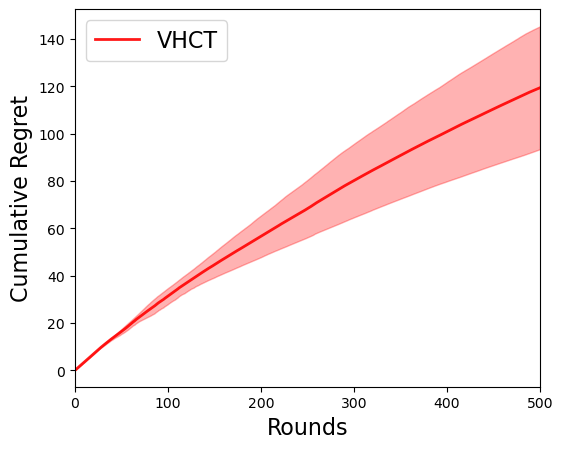

In [5]:
regret_array = np.array(regret_array)
regret_dic = {"regret": [regret_array],
              "labels": ["VHCT"],
              "colors": ['red']}

compare_regret_withsd(regret_dic, x_range=(0, rounds))